<a href="https://colab.research.google.com/github/Swarup0911/Machine-Learning-via-Campus-X/blob/main/end_to_end_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/csv files/placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [ ]:
df.shape

(100, 4)

In [ ]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

## **1. PreProcessing of Data**

In [ ]:
df =df.iloc[ : , 1: ]

# *2. EDA*

In [ ]:
import matplotlib.pyplot as plt


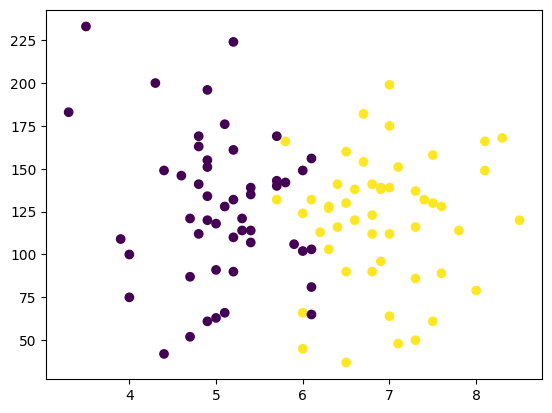

In [ ]:
plt.scatter(df['cgpa'] , df['iq'] , c= df['placement'])

# **Extracting Input and Output Columns**

In [ ]:
x = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [ ]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.1)

In [ ]:
x_train

,cgpa,iq
26,7.0,199.0
86,5.1,128.0
63,6.3,128.0
58,8.0,79.0
48,6.6,138.0
...,...,...
84,5.7,169.0
13,6.4,116.0
53,8.3,168.0
77,7.3,50.0


In [ ]:
y_train

,placement
26,1
86,0
63,1
58,1
48,1
...,...
84,0
13,1
53,1
77,1


In [ ]:
x_test

,cgpa,iq
57,6.5,130.0
98,6.3,103.0
65,8.1,166.0
90,7.3,86.0
92,5.2,110.0
82,6.5,37.0
83,7.5,130.0
81,5.4,107.0
85,5.8,166.0
15,5.1,176.0


In [ ]:
y_test


,placement
57,1
98,1
65,1
90,1
92,0
82,1
83,1
81,0
85,1
15,0


In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)


In [ ]:
x_train

array([[ 0.91616787,  1.89358812],
       [-0.73990724,  0.10443714],
       [ 0.30603493,  0.10443714],
       [ 1.78778635, -1.13032903],
       [ 0.56752048,  0.35643023],
       [ 1.17765341, -0.19795458],
       [ 1.35197711,  0.86041643],
       [ 0.91616787, -1.50831867],
       [ 0.04454939, -1.98710556],
       [ 0.82900602, -0.70194077],
       [ 1.26481526,  0.20523438],
       [-1.08855463, -0.92873455],
       [ 0.65468232,  0.75961919],
       [-0.4784217 ,  0.38162954],
       [ 1.87494819,  0.63362264],
       [ 0.91616787,  0.38162954],
       [ 0.82900602,  0.38162954],
       [-0.04261246, -0.44994767],
       [-0.82706909, -0.82793732],
       [ 1.00332972,  0.68402126],
       [-1.35004018,  0.63362264],
       [ 0.56752048, -0.09715734],
       [-1.08855463, -0.07195803],
       [-1.69868757, -0.60114353],
       [-0.65274539,  0.20523438],
       [-0.91423094,  0.255633  ],
       [-0.21693615,  0.20523438],
       [-0.91423094, -0.09715734],
       [-1.35004018,

In [ ]:
x_test = scaler.transform(x_test)


In [ ]:
x_test

array([[ 0.48035863,  0.15483576],
       [ 0.30603493, -0.5255456 ],
       [ 1.87494819,  1.0620109 ],
       [ 1.17765341, -0.95393386],
       [-0.65274539, -0.34915043],
       [ 0.48035863, -2.18870003],
       [ 1.35197711,  0.15483576],
       [-0.4784217 , -0.42474836],
       [-0.12977431,  1.0620109 ],
       [-0.73990724,  1.314004  ]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(x_train , y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
y_test

,placement
57,1
98,1
65,1
90,1
92,0
82,1
83,1
81,0
85,1
15,0


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test , y_pred)

0.9

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

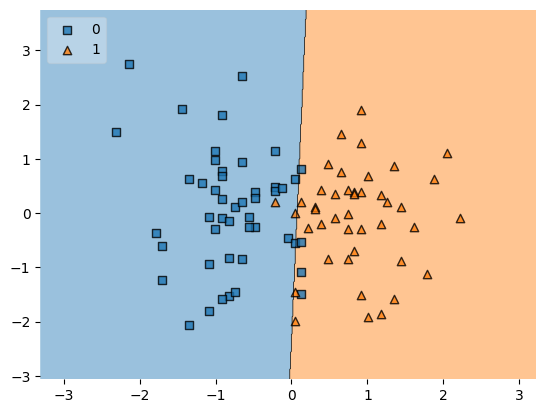

In [ ]:
plot_decision_regions(x_train , y_train.values , clf=clf , legend = 2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl' , 'wb'))